<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/experiment-repo/blob/master/Helpful_Python_snippets_for_Image_Processing_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helpful Python snippets for *Image Processing using OpenCV*

# Table Of Contents
1. [I/0: Read,Show,Write Images](#Basicio)
    - Image Represenation in OpenCV
2. [Basic Operations](#Basicops)
    - [Convert](#conv)
    - [Colorspaces](#clsp)
    - [Resize](#res)
    - [Flip](#flip)
    - [Rotate](#flip)
    - [Crop](#crp)
3. [Mathematical and Logical Operations on Images](#mathops)
    - [Artihmatic Operations](#arith)
    - [Logical Operations](#lgic)
4. [Image Enhancement](#imgenhc)
    - [Log Transform](#lg-trans)
    - [Power-law(Gamma) transformations](#pow-trans)
    - [Contrast Stretching](#con-strh)
    - [Histogram Equalization](#hist-eq)
    - [Spatial & Linear Filtering](#fltr)
5. [Morphological Image Processing](#morph)
6. [Geometric Operations](#geops)
    - [Affine Transformation](#aft)
    - [Perspective Transformation](#pst)
7. [Image Segmentation/Object Detection](#img-seg)
    - [Color or shape based object detection](#clr-objdet)
    - [Point Detect](#pt-objdet)
    - [Line Detect](#ln-objdet)
    - [Edge Detect](#edg-objdet)
    - [Hough Trabsform](#houg)
    - [Region-Based Segmentation]


In [0]:
#Imports

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [0]:
#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

In [0]:
#Sample Images

# !git clone https://github.com/MeAmarP/sample_imgs.git
os.listdir(os.path.join(os.getcwd(), 'sample_imgs'))


## 1. I/O: Read,Show,Write Images <a name="Basicio"></a>
### Types of Images:
+ Binary : 2D Array of pixels,where Pixel Value is either 0 or 255.
+ Grayscale : 2D Array of pixels,where Pixel Value is anything between 0-255 
+ RGB/TrueColor : 3D Array of pixels,where Pixel Value is anything between 0-255 

Note: RGB pixel format is quit standard among MATLAB or other image processing liberaies, but OpenCV uses BGR pixel format.

In [0]:
MainImgBin = cv2.imread('sample_imgs/cells_bin.png',cv2.IMREAD_UNCHANGED)
MainImgBGR = cv2.imread('sample_imgs/fruitbowl_rgb.jpg',cv2.IMREAD_UNCHANGED)
MainImgGray = cv2.imread('sample_imgs/alg_gry.jpg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)
print('Shape/Size of Gray Img:', MainImgGray.shape)
print('Shape/Size of Binary Img:', MainImgBin.shape)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image',color='c')
plt.subplot(1,3,2)
plt.imshow(MainImgGray,cmap='gray')
plt.title('Grayscale Image',color='c')
plt.subplot(1,3,3)
plt.imshow(MainImgBin)
plt.title('Binary Image',color='c')
plt.show()

# Why use cv2.IMREAD_UNCHANGED with IMREAD?
# https://stackoverflow.com/a/18871394
# https://docs.opencv.org/3.4.3/d4/da8/group__imgcodecs.html#gga292d81be8d76901bff7988d18d2b42acae80c3e72393ec86b8ea1db4a2a228b5f

## 2. Basic Operations: <a name="Basicops"></a>

### Convert: <a name="conv"></a>

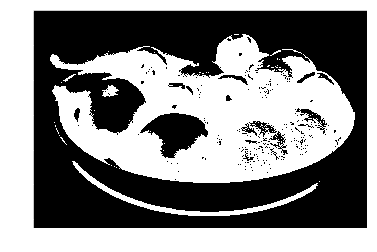

In [0]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

### Convert Colorspaces: <a name="clsp"></a>

In [0]:
#Changing Color Spaces
img_hls = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2YUV)
plt.imshow(img_hsv)

### Resize Image <a name="res"></a>

In [0]:
#
IMG_WIDTH = 400
IMG_HEIGHT = 400
img = cv2.imread('sample_imgs/fruitbowl_rgb.jpg')
print('Before Resize: ',img.shape[:2])

#Try Other Interploation Methods too
re1_img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_LANCZOS4)
re2_img = cv2.resize(img,(IMG_WIDTH*2,IMG_HEIGHT),interpolation=cv2.INTER_AREA)
print('After Resize 1: ',re1_img.shape[:2])
print('After Resize 2: ',re2_img.shape[:2])
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(re1_img)
plt.subplot(1,3,3)
plt.imshow(re2_img)
plt.show()

### Flip/Rotate Images <a name="flip"></a>
*interactive*

In [0]:
@interact_manual(angle_val=widgets.IntSlider(min=0, max=360, step=5, value=10))
def rotate_img(angle_val):
    path_to_grayscale_img = 'sample_imgs/lena_gry.bmp'
    scaleFactor = 1
    img = cv2.imread(path_to_grayscale_img,cv2.IMREAD_UNCHANGED)
    rows,cols = img.shape
    imgCenter = (cols-1)/2.0,(rows-1)/2.0
    #Calculate an affine matrix of 2D rotation. 
    rotateMat = cv2.getRotationMatrix2D(imgCenter,angle_val,scaleFactor)
    # Apply an affine transformation to an image. 
    out_img = cv2.warpAffine(img,rotateMat,(cols,rows))
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1), plt.imshow(img,cmap='gray') ,plt.title('Original Image',color='c')
    plt.subplot(1,2,2), plt.imshow(out_img,cmap='gray'), plt.title('Rotated Image',color='c')
    plt.show()

### Crop Images <a name="crp"></a>

In [0]:
#
#Note is more about array slicing. refer row & column vals from x,y-axis for ROI.
img = cv2.imread('sample_imgs/tank_gry.tiff',cv2.IMREAD_UNCHANGED)

#Slicing using ROI
cropped = img[150:350,150:310].copy()
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
plt.subplot(122),plt.imshow(cropped,cmap='gray'),plt.title('Cropped',color='c')

## 3. Mathematical and Logical Operations on Images <a name="mathops"></a>

### Artihmatic Operations <a name="arith"></a>
*interactive*

In [0]:
#Math_Ops = Add, Subtract, Multiply, Divide
BasicArithOps = ['add','subtract','multiply','divide']

@interact_manual(arith_op=BasicArithOps,para_val=widgets.IntSlider(min=1, max=100, step=1, value=10))
def arithops_on_img(arith_op,para_val):
  img = cv2.imread('sample_imgs/lena_gry.bmp',cv2.IMREAD_UNCHANGED)
  if arith_op == 'add':
    s_img = img + para_val
  elif arith_op == 'subtract':
    s_img = img - para_val
  elif arith_op == 'multiply':
    s_img = img * para_val
  elif arith_op == 'divide':
    #Use Floor Divison operator
    s_img = img // para_val
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
  plt.subplot(122),plt.imshow(s_img,cmap='gray'),plt.title('Math Operation',color='c')
  plt.show()

img,s_img = arithops_on_img('add',100)


### Logical Operations <a name="lgic"></a>
*interactive*

In [0]:
#Logical/Bitwise Operations
path_to_grayscale_img = 'sample_imgs/lena_gry.bmp'
LogicalOps = ['and','or','xor','not']

@interact_manual(logical_op=LogicalOps)
def logicalops_on_img(logical_op):
    img = cv2.imread(path_to_grayscale_img)
    h,w,_ = img.shape
    mask_img = np.concatenate((np.zeros(shape=[h,(w//3),3],dtype=np.uint8),
                              np.ones(shape=[h,(w//3)+2,3],dtype=np.uint8)*127,
                              np.ones(shape=[h,(w//3),3],dtype=np.uint8)*255),
                              axis=1)
    if logical_op == 'and':
        print('Performed Bitwise AND')
        result_img = cv2.bitwise_and(img,mask_img)        
    elif logical_op == 'or':
        print('Performed Bitwise OR')
        result_img = cv2.bitwise_or(img,mask_img)
    elif logical_op == 'xor':
        print('Performed Bitwise XOR')
        result_img = cv2.bitwise_xor(img,mask_img)
    elif logical_op == 'not':
        print('Performed Bitwise NOT')
        result_img = cv2.bitwise_not(img)        
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('Original',color='c')
    plt.subplot(132),plt.imshow(mask_img,cmap='gray'),plt.title('Mask',color='c')
    plt.subplot(133),plt.imshow(result_img,cmap='gray'),plt.title('Processed Image',color='c')
    plt.show()

## 4. Image Enhancement <a name="imgenhc"></a>

### Log Transform <a name="lg-trans"></a>

In [0]:
path_to_img = 'sample_imgs/tank_gry.tiff'
def applyLogTransform(path_to_img):
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    img_log = np.array(img_log,dtype=np.uint8)
    hist_img_log = cv2.calcHist([img_log],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_log,cmap='gray'),plt.title('Log Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_log),plt.title('Histogram: After',color='c')
    plt.show()
    return

### Gamma Trasform <a name="pow-trans"></a>

In [0]:
path_to_img = 'sample_imgs/tank_gry.tiff'

#gamma_vals = [0.1, 0.5, 1.2, 2.2]
def applyGammaTransform(path_to_img,gamma_val=None):
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    gamma_corrected = np.array(255*(img / 255) ** gamma_val, dtype = 'uint8')
    hist_img_gamma = cv2.calcHist([gamma_corrected],[0],None,[256],[0,256])

    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(gamma_corrected,cmap='gray'),plt.title('Gamma Transformed Img',color='c')
    plt.subplot(224),plt.plot(hist_img_gamma),plt.title('Histogram: After',color='c')
    plt.show()
    return

applyGammaTransform(path_to_img,gamma_val=0.8)

### Contrast Stretching <a name="con-strh"></a>

In [0]:
#Apply 
# - MinMax Stretching
path_to_img = r'sample_imgs\lena_gry.bmp'

def applyContrastStretching(path_to_img):
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    minmax_img = np.zeros((img.shape[0],img.shape[1]),dtype='uint8')
    
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            minmax_img[r,c] = 255*(img[r,c]-np.min(img)) / (np.max(img)-np.min(img))
    # minmax_img[:,:] = 255*(img[:,:]-np.min(img)) / (np.max(img)-np.min(img))
    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_contrast_stretch = cv2.calcHist([minmax_img],[0],None,[256],[0,256])
    plt.figure(figsize=(10,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(minmax_img,cmap='gray'),plt.title('MinMax Contrast Stretching',color='c')
    plt.subplot(224),plt.plot(hist_contrast_stretch),plt.title('Histogram: After',color='c')
    return


applyContrastStretching(path_to_img)

### Histogram Equalization <a name="hist-eq"></a>

In [0]:
#Histrogram Equalisation
path_to_img = 'sample_imgs/lena_gry.bmp'

def applyHistEqualization(path_to_img):
    img = cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE)
    img_histEq = cv2.equalizeHist(img)

    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_imgEqu = cv2.calcHist([img_histEq],[0],None,[256],[0,256])
    plt.figure(figsize=(10,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_histEq,cmap='gray'),plt.title('Histogram Equalization',color='c')
    plt.subplot(224),plt.plot(hist_imgEqu),plt.title('Histogram: After',color='c')
    return

def applyCLAHE(path_to_img):
    img = cv2.imread(path_to_img,cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=0.8,tileGridSize=(8,8))
    img_clahe = clahe.apply(img)

    hist_img = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_imgClahe = cv2.calcHist([img_clahe],[0],None,[256],[0,256])

    plt.figure(figsize=(10,10))
    plt.subplot(221),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(222),plt.plot(hist_img),plt.title('Histogram: Before',color='c')
    plt.subplot(223),plt.imshow(img_clahe,cmap='gray'),plt.title('CLAHE',color='c')
    plt.subplot(224),plt.plot(hist_imgClahe),plt.title('Histogram: Before',color='c')
    return

# applyHistEqualization(path_to_img)
# applyCLAHE(path_to_img)


### Spatial & Linear Filtering <a name="fltr"></a>
+ blur() - Normalized Box Filter
+ gaussianblur() - Gaussian
+ medianblur() - Median
+ filter2d() - Custom Arbitary Linear Filter
+ bilateralfilter() - Bilateral Filter

For detailed opencv documentation on filter methods visit link below> 
https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

In [0]:
#filters/blurr Neighborhood Operations

path_to_img = 'sample_imgs/lena_gry.bmp'

def applyFilter(path_to_img,func_filter=None,kernel_len=None):
    img = cv2.imread(path_to_img)
    if img is None:
        print('Unable to Read Image. Check you gave right path')
        return -1
    if func_filter == 'blur':
        img_fltr = cv2.blur(img,(kernel_len,kernel_len))
    if func_filter ==  'gaussian':
        img_fltr = cv2.GaussianBlur(img,(kernel_len,kernel_len),0)
    if func_filter == 'median':
        #kernal_len should be odd and greater than 1
        img_fltr = cv2.medianBlur(img,kernel_len)
    if func_filter == 'bilateral':
        img_fltr = cv2.bilateralFilter(img,kernel_len,kernel_len*2,kernel_len*2)
    if func_filter == 'arbitary':
        img_fltr =  cv2.filter2D(img,-1,kernel_len)

    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(122),plt.imshow(img_fltr,cmap='gray'),plt.title((func_filter+' Filter Applied Img'),color='c')
    return 

# applyFilter(path_to_img,func_filter='blur',kernel_len=5)

### More Filters:
+ Laplacian
+ motion-vertical
+ motion-horizontal

In [0]:

path_to_img = 'sample_imgs/lena_gry.bmp'

def applyMoreFilter(path_to_img,func_filter=None,kernel_len=None):
    img = cv2.imread(path_to_img)

    if func_filter == 'laplace':
        img_fltr = cv2.Laplacian(img,-1,3)
    if func_filter == 'motion-v':
        kernel_verti = np.zeros((kernel_len,kernel_len))
        kernel_verti[:, int((kernel_len - 1)/2)] = np.ones(kernel_len)
        kernel_verti /= kernel_len
        img_fltr = cv2.filter2D(img,-1,kernel_verti)
    if func_filter == 'motion-h':
        kernel_horiz = np.zeros((kernel_len,kernel_len))
        kernel_horiz[int((kernel_len - 1)/2),:] = np.ones(kernel_len)
        kernel_horiz /= kernel_len
        img_fltr = cv2.filter2D(img,-1,kernel_horiz)

    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(122),plt.imshow(img_fltr,cmap='gray'),plt.title((func_filter+' Filter Applied Img'),color='c')
    return

# applyMoreFilter(path_to_img,func_filter='motion-h',kernel_len=21)

### 5. Morphological Transformations: <a name="morph"></a>
+ Erosion
+ Dilation
+ Opening
+ Closing
+ Morphological Gradient
+ Top-Hat
+ Black-Hat

In [0]:
#
path_to_img = 'imgs/cells_bin.png'

def applyMorphoTransform(path_to_img,morph_op=None,kernel_len=None,iters=None):
    img = cv2.imread(path_to_img)
    kernel = np.ones((kernel_len,kernel_len),np.uint8)

    if morph_op == 'erode':
        img_morph = cv2.erode(img,kernel,iterations=iters)
    if morph_op == 'dilate':
        img_morph = cv2.dilate(img,kernel,iterations= iters)
    if morph_op == 'opening':
        img_morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    if morph_op == 'closing':
        img_morph = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    if morph_op == 'morph_grad':
        img_morph = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    if morph_op == 'top-hat':
        img_morph = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
    if morph_op == 'black-hat':
        img_morph = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
    plt.subplot(122),plt.imshow(img_morph,cmap='gray'),plt.title(morph_op+'applied Img',color='c')

    return

# applyMorphoTransform(path_to_img,morph_op='opening',kernel_len=5,iters=1)

## 6. Geometric Operations<a name="geops"></a>

### Affine Transformation <a name="aft"></a>

In [0]:

path_to_img = 'imgs/bricks_in_wall_bin.tiff'
img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
rows, cols = img.shape[:2]

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.5*(cols-1)),0], [int(0.5*(cols-1)),rows-1]])

affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Img',color='c')
plt.subplot(122),plt.imshow(img_output,cmap='gray'),plt.title('Transformed Img',color='c')

### Perspective Transformation<a name="pst"></a>

In [0]:
path_to_img = 'imgs\Baraja_de_UNO.jpg'

img = cv2.imread(path_to_img)

ptsMain = np.float32([[230,283],[347,234],[349,433],[472,370]])
ptsTrans = np.float32([[0,0],[400,0],[0,400],[400,400]])

mat = cv2.getPerspectiveTransform(ptsMain,ptsTrans)
img_out = cv2.warpPerspective(img,mat,(400,400))

for pt in ptsMain:
    pt = tuple(pt)
    img = cv2.circle(img,(tuple(pt)), 8, (255,0,0), -1)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
plt.subplot(122),plt.imshow(img_out),plt.title('Transformed',color='c')
plt.show()

## 7. Image Segmentation:<a name="img-seg"></a>

### Point Detect <a name="pt-objdet"></a>

In [0]:
#POint Detection

path_to_img = r'sample_imgs\alg_gry.jpg'

def pointDetctor(path_to_img):
    img = cv2.imread(path_to_img)
    kernel = np.float32([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    img_out = cv2.filter2D(img,-1,kernel)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_out),plt.title('Transformed',color='c')
    plt.show()
    return
pointDetctor(path_to_img)

### Line Detection <a name="ln-objdet"></a>

In [0]:

path_to_img = r'sample_imgs\bricks_in_wall_bin.tiff'

hori_line_mat = np.float32([[-1,-1,-1],
                            [2,2,2],
                            [-1,-1,-1]])

verti_line_mat = np.float32([[-1,2,-1],
                            [-1,2,-1],
                            [-1,2,-1]])
def lineDetector(path_to_img,kernel):
    img = cv2.imread(path_to_img)
    img_out = cv2.filter2D(img,-1,kernel)                        
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_out),plt.title('Transformed',color='c')
    plt.show()    
    return
lineDetector(path_to_img,verti_line_mat)

### Edge Detection<a name="edg-objdet"></a>
- sobel
- prewitt
- canny
- roberts
- scharr

In [0]:


path_to_img = 'sample_imgs/lena_gry.bmp'
algo_edgedetect = ['sobel', 'prewitt','canny','roberts','scharr']
def edgeDetector(path_to_img,algo_edgedetect=None):
    img = cv2.imread(path_to_img)
    if algo_edgedetect == 'canny':
        img_edge = cv2.Canny(img,100,200)
    if algo_edgedetect == 'sobel':
        img_edge = cv2.Sobel(img,-1,1,0,ksize=-1)
    if algo_edgedetect == 'prewitt':
        prewitt_kernel_h = np.array([[1,1,1],
                                    [0,0,0],
                                    [-1,-1,-1]])
        prewitt_kernel_v = np.array([[-1,0,1],
                                    [-1,0,1],
                                    [-1,0,1]])
        prewitt_h = cv2.filter2D(img,-1,prewitt_kernel_h)
        prewitt_v = cv2.filter2D(img,-1,prewitt_kernel_v)
        img_edge = prewitt_h + prewitt_v
    if algo_edgedetect == 'roberts':
        roberts_kernel_h = np.array([[-1,0],[0,1]])
        roberts_kernel_v = np.array([[0,-1],[1,0]])
        roberts_h_ele = cv2.filter2D(img,-1,roberts_kernel_h)
        roberts_v_ele = cv2.filter2D(img,-1,roberts_kernel_v)
        img_edge = roberts_h_ele + roberts_v_ele
    if algo_edgedetect == 'scharr':
        # img_gaussian = cv2.GaussianBlur(img,(3,3),5)
        # img_edge = cv2.Laplacian(img_gaussian,-1)
        img_edge = cv2.Scharr(img,-1,1,0)
    # print(img_edge.dtype0
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img_edge),plt.title('Output',color='c')
    plt.show()
    return
edgeDetector(path_to_img,algo_edgedetect='scharr')



### Hough Transforms:<a name="houg"></a>

In [0]:
# Line Detection
def houghLineDetector(path_to_img):
    img = cv2.imread(path_to_img)
    img_edge = cv2.Canny(img,80,200)
    lines = cv2.HoughLinesP(img_edge,5,np.pi/180,20,minLineLength=50,maxLineGap=10)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img_edge),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img),plt.title('Output',color='c')
    plt.show()
    return

def houghCircleDetector(path_to_img):
    img = cv2.imread(path_to_img)
    img = cv2.medianBlur(img,3)
    img_edge = cv2.Canny(img,100,200)

    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=20,param1=200,param2=70)
    circles = np.uint16(np.around(circles))
    for val in circles[0,:]:
        cv2.circle(img,(val[0],val[1]),val[2],(255,0,0),2)

    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(img_edge),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(img),plt.title('Result',color='c')
    plt.show()
    return

path_to_img = 'sample_imgs/indian_coins.jpg'

# houghLineDetector(path_to_img)
houghCircleDetector(path_to_img)

### Color Object Detection <a name="clr-objdet"></a>

In [0]:
#HSV Based
def detectColorObjects(path_to_img,find_color=None):
    img =cv2.imread(path_to_img)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    if find_color == 'red':
        Red1Lower = np.array([0,90,100])
        Red1Upper = np.array([10,255,255])
        #(170-180)
        Red2Lower = np.array([170,90,100])
        Red2Upper = np.array([180,255,255])
        img_mask1 = cv2.inRange(img_hsv,Red1Lower,Red1Upper)
        img_mask2 = cv2.inRange(img_hsv,Red2Lower,Red2Upper)
        img_mask = img_mask1+img_mask2
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    if find_color == 'green':
        GreenLower = np.array([40,100,100])
        GreenUpper = np.array([80,255,255])
        img_mask = cv2.inRange(img_hsv,GreenLower,GreenUpper)
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    return img,img_mask


def markDetectdObjects(og_img,masked_img):
    # Find Blue Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area):
            x,y,w,h = cv2.boundingRect(contour)
            # FinImg = cv2.rectangle(og_img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(FinImg,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            # BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

path_to_img = 'sample_imgs/skittle_rgb.tiff'
img,maskedImg =detectColorObjects(path_to_img,find_color='green')
markDetectdObjects(img,maskedImg)

### Shape object detection <a name="shp-objdet"></a>

In [0]:
#Shape Detection
path_to_img = 'sample_imgs/wiki_shapes.jpg'
def detectShapes(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    _,img_Otsubin = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contours,_ = cv2.findContours(img_Otsubin.copy(),1,2)
    for num,cnt in enumerate(contours):
        x,y,w,h = cv2.boundingRect(cnt)
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        # print(num, approx)
        if len(approx) == 3:
            cv2.putText(img,"Triangle",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
        if len(approx) == 4:
            cv2.putText(img,"Rect",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
        if len(approx) > 10:
            cv2.putText(img,"Circle",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
            
    plt.figure(figsize=(10,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img_Otsubin,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result')
    plt.show()
    return

detectShapes(path_to_img)

In [0]:
# Image Segmentation: Watershed Algorithm
# Sleep In Progress (^-^)